# Lyrics Match - Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Importing data and EDA

In [2]:
df = pd.read_csv('data/lyrics_small.csv')

In [3]:
df.head()

,song,year,artist,genre,lyrics
0,the-downward-spiral,2007,discharge,Rock,Mother Dear Mother\nIt's Cold Tonight\nLike Ev...
1,lulu-s-back-in-town,2008,fats-waller,Jazz,"Gotta get my old tuxedo pressed, gotta sew a b..."
2,donde-quieras-yo-ire,2006,backstreet-boys,Pop,Al fin del mundo llegare\nLo que quieras you h...
3,falling-in-love,2007,don-williams,Country,"Falling In Love Again\nLove be gentle, love be..."
4,i-hate-u-i-love-you,2016,gnash,Rock,Feeling used\nBut I'm\nStill missing you\nAnd ...


In [4]:
# The following shoes that there is data for each between 1970-2016
np.sort(df['year'].unique())

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016])

In [5]:
df[df['song'] == 'amours']

,song,year,artist,genre,lyrics
70,amours,2006,attaque-louise,Not Available,"Amour, mon pÃ¨re et je n'sais pas comment\nAmo..."


In [6]:
df['genre'].unique()

array(['Rock', 'Jazz', 'Pop', 'Country', 'Not Available', 'Metal',
       'Electronic', 'Hip-Hop', 'Other', 'Indie', 'R&B', 'Folk'],
      dtype=object)

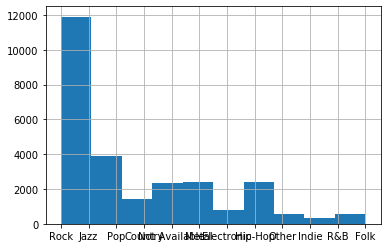

In [7]:
df['genre'].hist()
plt.rcParams["figure.figsize"] = (12,6)

### Data Cleaning and Preprocessing

In [8]:
import re
from nltk.corpus import stopwords

def lyrics_cleaner(lyrics):
    
    # Extract only characters
    lyrics = re.sub("[^a-zA-Z]", " ", lyrics)
    
    # Tokenize into words (all lower case)
    lyrics = lyrics.lower().split()
    
    # Remove stopwords
    eng_stopwords = set(stopwords.words("english"))
    lyrics = [word for word in lyrics if not word in eng_stopwords]
    
    # Join the review to one sentence
    lyrics = ' '.join(lyrics)
    
    return lyrics

In [9]:
%%time

df['lyrics'] = df['lyrics'].apply(lyrics_cleaner)

CPU times: user 5.79 s, sys: 743 ms, total: 6.53 s
Wall time: 6.61 s


In [10]:
from langdetect import detect

In [21]:
%%time

df['language'] = df['lyrics'].apply(lambda lyrics: detect(lyrics))

LangDetectException: No features in text.

In [16]:
df['lyrics'][70]

'amour mon p et je n sais pas comment amour et tous ces sentiments amour mon fr et ur videmment amour serait ce un jeu enfants crier tout le temps amour de longue date qui tend qui tend amour avec un grand c est long c est long c est long et amour mon amulette du cou autour excellent amour serait ce un jeu enfants crier tout le temps amour mon p et je n sais pas comment amour et tous ces sentiments amour mon fr et ur videmment amour serait ce un jeu enfants crier amour de longue date qui tend qui tend amour avec un grand c est long c est long c est long et amour mon amulette du cou autour excellent amour serait ce un jeu enfants crier amour la premi fois amoureux de son plus jeune ge c est l amour de la premi page lue pour la derni fois oh amour de ce doux c page qui glisse au palais parfois et amour serait ce un jeu enfants crier amour mon p et je n sais pas comment amour et tous ces sentiments amour mon fr et ur videmment amour serait ce un jeu enfants crier tout le temps'

In [18]:
df.head()

,song,year,artist,genre,lyrics,language
0,the-downward-spiral,2007,discharge,Rock,mother dear mother cold tonight like every eve...,en
1,lulu-s-back-in-town,2008,fats-waller,Jazz,gotta get old tuxedo pressed gotta sew button ...,en
2,donde-quieras-yo-ire,2006,backstreet-boys,Pop,al fin del mundo llegare lo que quieras hare s...,en
3,falling-in-love,2007,don-williams,Country,falling love love gentle love kind give heart ...,en
4,i-hate-u-i-love-you,2016,gnash,Rock,feeling used still missing see end wanna feel ...,en


In [16]:
X = df['lyrics']
y = df['genre']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)
vectorizer = CountVectorizer(analyzer='word', \
                             tokenizer=None, \
                             preprocessor=None, \
                             stop_words=None,
                             max_features=5000)

In [19]:
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=5000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [20]:
print(vectorizer.get_feature_names()[20:40])

['actin', 'acting', 'action', 'actions', 'acts', 'actually', 'ad', 'adam', 'add', 'addicted', 'addiction', 'address', 'adesso', 'admit', 'adore', 'advice', 'afar', 'affair', 'affection', 'afford']


In [21]:
train_bag = vectorizer.transform(X_train) #transform to a feature matrix
test_bag = vectorizer.transform(X_test)

In [22]:
print(train_bag.toarray().shape)
print(test_bag.toarray().shape)

(178588, 5000)
(87962, 5000)


### Classification

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [24]:
forest = RandomForestClassifier(n_estimators = 50)

In [25]:
%%time

forest = forest.fit(train_bag, y_train)

CPU times: user 19min 31s, sys: 8.94 s, total: 19min 39s
Wall time: 20min 34s


In [26]:
train_predictions = forest.predict(train_bag)
valid_predictions = forest.predict(test_bag)

### Accuracy

In [27]:
metrics.accuracy_score(y_train,train_predictions)

0.9757150536430219

In [28]:
metrics.accuracy_score(y_test,valid_predictions)

0.5638343830290352